**Capstone Project on Census income**

In [142]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import  r2_score, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

In [143]:
df= pd.read_csv('/content/adult.csv')

In [144]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In this  Dataset
Each entry contains the following information
about an individual:

● age: the age of an individual

● workclass: a general term to represent the employment status of an individual


● fnlwgt: final weight.

● education: the highest level of education achieved by an individual.

● education­num: the highest level of education achieved in numerical form.

● marital­status: marital status of an individual.

● occupation: the general type of occupation of an individual

● relationship: represents what this individual is relative to others.

● race: Descriptions of an individual’s race

● sex: the biological sex of the individual


● capital­loss: capital loss for an individual

● hours­per­week: the hours an individual has reported to work per week.

● native­country: country of origin for an individual

●  income : whether or not an individual makes more than $50,000 annually.

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


**Checking for unique value in columns**

In [146]:
for col in df.columns:
  unique_values = df[col].unique()
  print(f"Column: {col}, Unique values: {unique_values}")


Column: age, Unique values: [25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
Column: workclass, Unique values: ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Column: fnlwgt, Unique values: [226802  89814 336951 ... 129912 255835 257302]
Column: education, Unique values: ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
Column: educational-num, Unique values: [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
Column: marital-status, Unique values: ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
Column: occupation, Unique values: ['Machine-op-inspct' 'Farmin

# **EDA**

**Data cleaning and pre-processing**

In [147]:
df = df.replace('?', np.nan)

In [148]:
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [149]:
df= df.dropna()

In [150]:
df.duplicated().sum()

47

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [152]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [153]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [154]:
(df['native-country'].value_counts()/len(df))[:5]

United-States    0.913095
Mexico           0.019968
Philippines      0.006258
Germany          0.004268
Puerto-Rico      0.003870
Name: native-country, dtype: float64

**Here 90% of the native-country is us that make our model less accurate and misleading. so we will drop this column**

In [155]:
df.drop(columns = ['native-country'], inplace = True)

**checking the values in  % of capitla gian and loss columns**

In [156]:
capital_gain = len(df[df['capital-gain']==0])/len(df)
capital_loss = len(df[df['capital-loss']==0])/len(df)

print(f"{capital_gain}%,{capital_loss}%")

0.91619123435496%,0.9526779001371014%


**Here more than 90% of capitla Gain and loss columns equal to 0.These will make model less accurate. let's drop this column**

In [157]:
df.drop(columns=['capital-gain', 'capital-loss'], inplace=True)

In [158]:
df.head(1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,<=50K


In [159]:
df.drop(columns=['fnlwgt'], inplace = True)

In [160]:
df.describe()

,age,educational-num,hours-per-week
count,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,40.938017
std,13.217870,2.552881,12.007508
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


In [161]:
pal = ['#93bac2','#adc293','#c29793', '#E28F6B', '#76A15A', '#838477' ]

def r_color(num=1, seed=None):

    if seed == None:
        seed = np.random.randint(0, 420, size=1)
        np.random.seed(seed)

    colors = np.random.choice(pal, num, replace=False)

    # Return the colors
    return list(colors)

**Visulization**

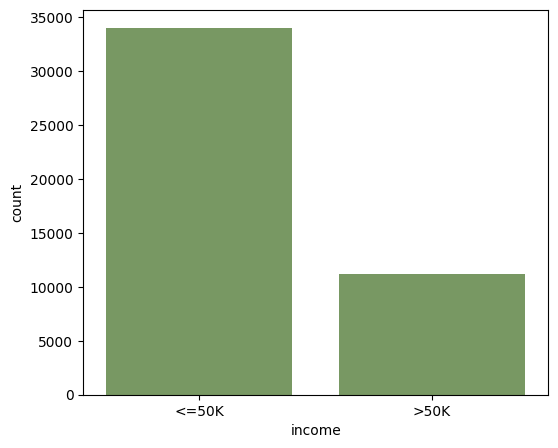

In [162]:
workclass_data= df['income'].value_counts()
order = list(workclass_data.index)

plt.figure(figsize =(6,5))
plot = sns.countplot(data=df, x='income', order=order,palette = r_color(num=1))
plt.show()

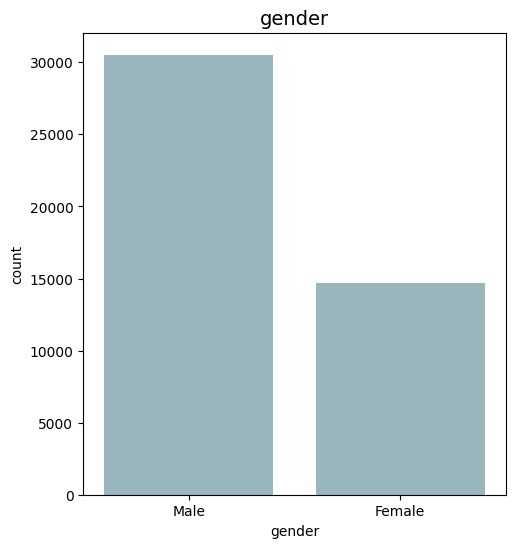

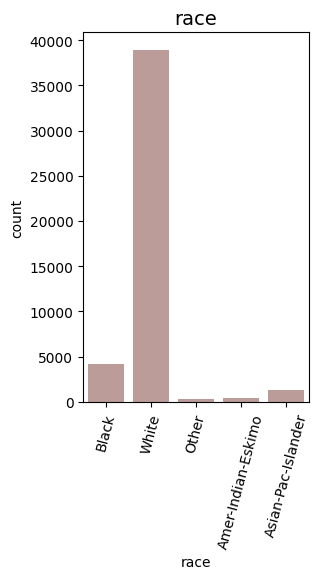

In [163]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('gender', size=14)
custom_palette = ["#FF5733", "#33FF57", "#3357FF"]
plot= sns.countplot(data= df, x='gender',  palette = r_color(num=1, seed=0))
plt.show()

plt.subplot(1,2,2)
plt.title('race', size=14)
plot=sns.countplot(data=df, x='race', palette = r_color(num=1, seed=2))
plt.xticks(rotation=75)
plt.show()


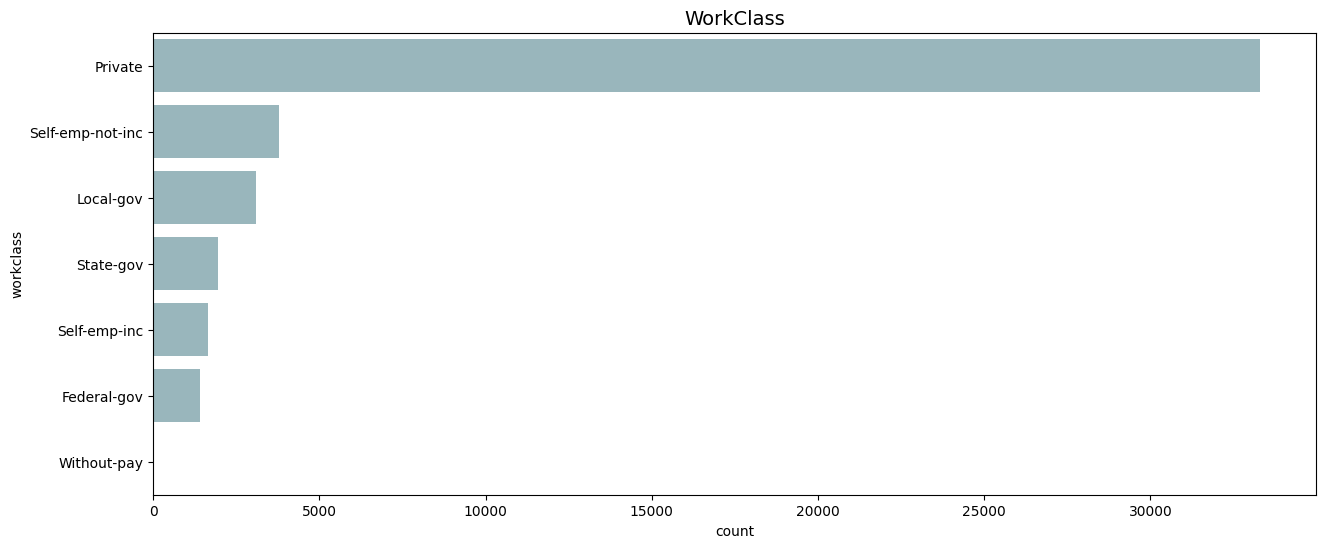

In [170]:
workclass_data= df['workclass'].value_counts()
order=list(workclass_data.index)

plt.figure(figsize=(15,6))
plt.title('WorkClass', size=14)
plot= sns.countplot(data=df, y ='workclass', orient='h', order=order, palette = r_color(num=1))
plt.show()


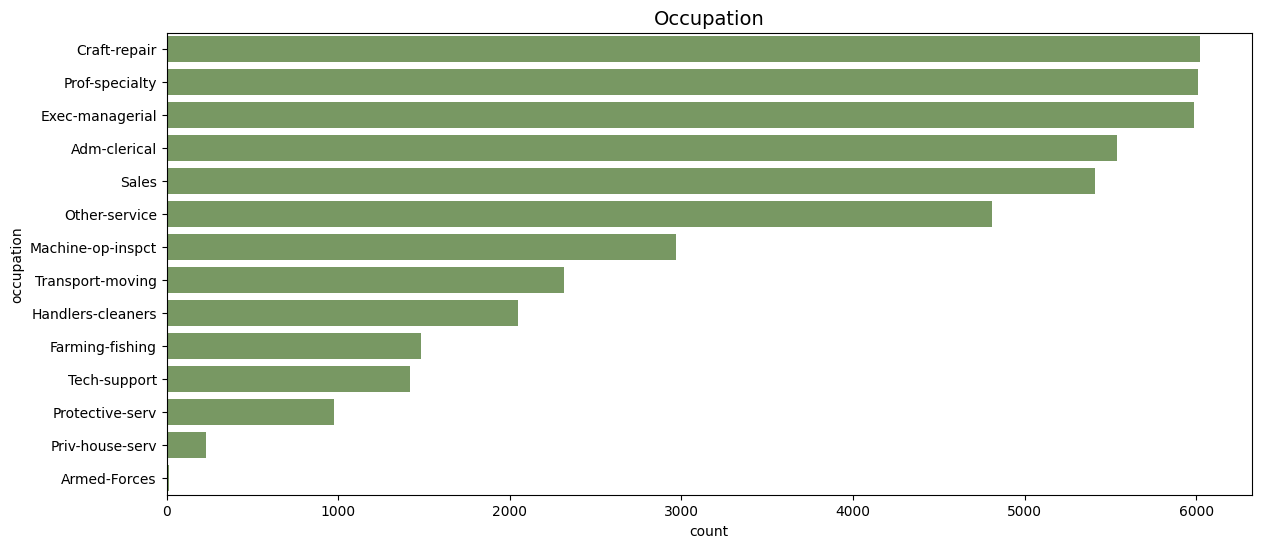

In [171]:
occupation_data=df['occupation'].value_counts()
order = list(occupation_data.index)

plt.figure(figsize=(14,6))
plt.title('Occupation', size=14)
plot= sns.countplot(data=df, y='occupation', orient='h', order=order, palette=r_color(num=1, seed=0))

Text(0.5, 1.0, 'hour_per_week')

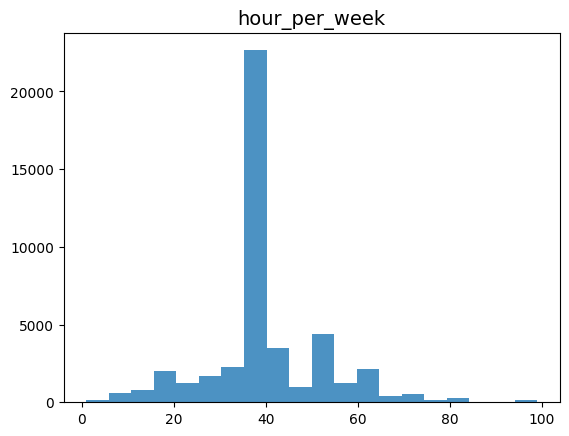

In [172]:
plt.hist(df['hours-per-week'], bins=20, alpha=0.8)
plt.title('hour_per_week', size =14)

In [173]:
Relationship_data=df['relationship'].value_counts()

order = list(Relationship_data.index)
values = list(Relationship_data.values)

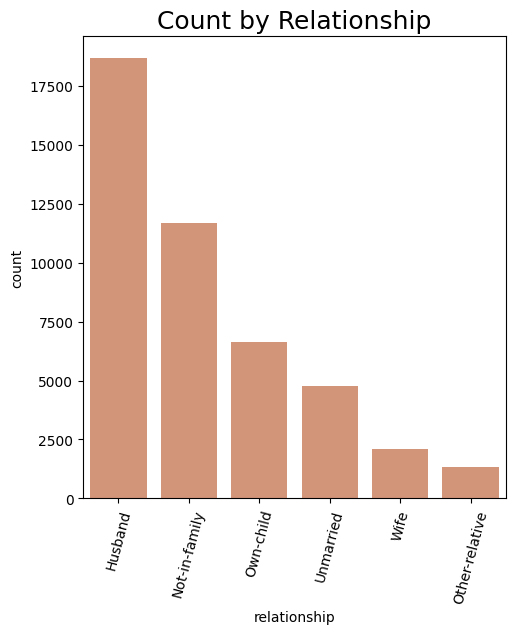

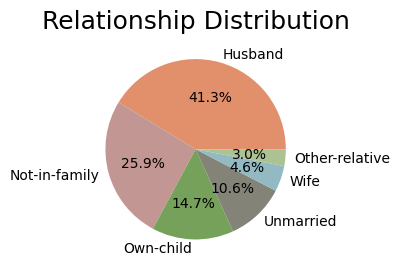

In [174]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plot1 = sns.countplot(data=df, x= 'relationship', order=order, palette= r_color(num=1, seed=0))
plt.title('Count by Relationship', fontsize=18)
plt.xticks(rotation=75)
plt.show()

plt.subplot(1,2,2)
plt.pie(values, labels=order, autopct='%1.1f%%', colors= r_color(num=6, seed=0))
plt.title('Relationship Distribution', fontsize=18)
plt.show()

In [175]:
education_data=df['education'].value_counts()
order1= list(education_data.index)

EducationNum_data=df['educational-num'].value_counts()
order2=list(EducationNum_data.index)

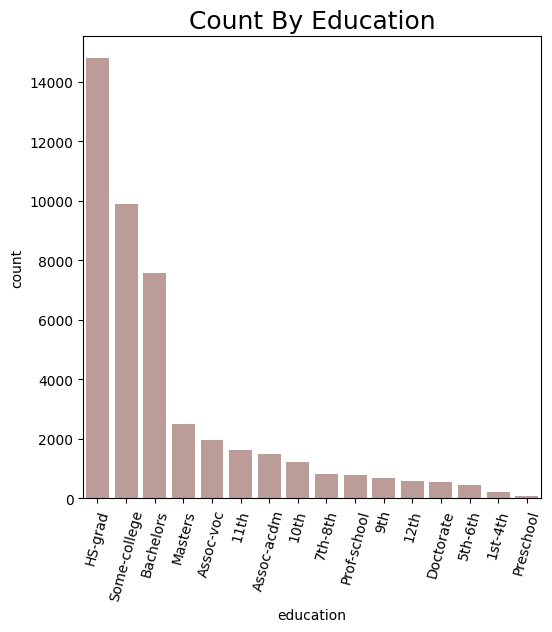

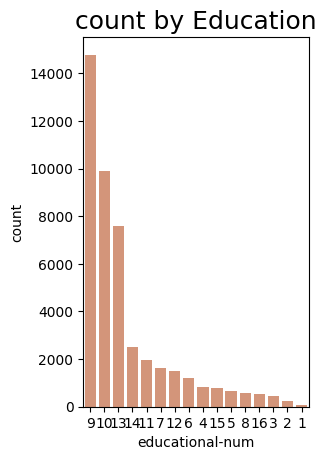

In [176]:
plt.figure(figsize=(13,6))

plt.subplot(1,2,1)
plot1= sns.countplot(data= df, x ='education', order=order1, palette=r_color(num=1, seed=0))
plt.title('Count By Education', fontsize=18)
plt.xticks(rotation=75)
plt.show()

plt.subplot(1,2,2)
plot2= sns.countplot(data=df, x='educational-num', order = order2, palette= r_color(num=1, seed=42))
plt.title('count by Education', fontsize=18)
plt.show()

**here we can see that the education column related with educational-num column i.e Hs-grad =9, some-college =10 bachelors=13 and so on so let's drop educaton column as well**

In [177]:
df.drop(columns='education', inplace=True)

In [178]:
df.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,>50K
5,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,30,<=50K


**Data Encoding**

In [179]:
#list of column contain more than 2 unique and less than or equal to 42

col_list= [col for col in df.columns if 42>=df[col].nunique()>2]
col_list

['workclass',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race']

In [180]:
# label encoder
def label_encoder(dataframe,binary_col):
  labelencoder = LabelEncoder()
  dataframe[binary_col]= labelencoder.fit_transform(dataframe[binary_col])
  return dataframe

for col in ['income', 'gender']:
  df=label_encoder(df,col)


In [181]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    encoded_data = dataframe.copy()

    for col in categorical_cols:
        dumm = pd.get_dummies(dataframe[col], prefix=col, dtype=int, drop_first=drop_first)
        del encoded_data[col]
        encoded_data = pd.concat([encoded_data, dumm], axis=1)

    return encoded_data

df = one_hot_encoder(df, ['workclass','educational-num','marital-status','occupation','relationship','race'])

In [182]:
df.shape

(45222, 53)

**Models Building**

In [183]:
# Spliting data
X= df.drop('income', axis =1) #Independent
y=df['income'] #target

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [184]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (36177, 52)
y_train shape: (36177,)
X_test shape: (9045, 52)
y_test shape: (9045,)


In [185]:
# defining models
Models=[("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),
        ("DT_model", DecisionTreeClassifier(random_state=42)),
        ("RF_model", RandomForestClassifier(random_state=42, n_jobs=-1))
]

In [186]:
accuracies = {}
models = {}
model = Models
for name,model in Models:
    model.fit(X_train, y_train)
    models[name] = model
    acc = model.score(X_train, y_train)*100
    accuracies[name] = acc
    print("{} Accuracy Score : {:.3f}%".format(name,acc))

LR_model Accuracy Score : 82.920%
DT_model Accuracy Score : 95.950%
RF_model Accuracy Score : 95.950%


In [187]:
models_res = pd.DataFrame(data=accuracies.items())
models_res.columns = ['Model','Test score']
models_res.sort_values('Test score',ascending=False)

,Model,Test score
1,DT_model,95.950466
2,RF_model,95.950466
0,LR_model,82.920087


In [188]:
# Decision Tree
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

acc_train = round(DT_model.score(X_train, y_train) * 100, 2)
print(acc_train, "%")

acc_test = round(DT_model.score(X_test, y_test) * 100, 2)
print(acc_test, "%")

95.95 %
78.52 %


**it is overfitted let's reduce the effect of overfitting.**

In [189]:
DT_model = DecisionTreeClassifier(max_depth=40,
                                  max_features='auto',
                                  min_samples_leaf=40,
                                  min_samples_split=5,
                                  random_state=42)

DT_model.fit(X_train, y_train)

acc_train = round(DT_model.score(X_train, y_train) * 100, 2)
print(acc_train, "%")

acc_test = round(DT_model.score(X_test, y_test) * 100, 2)
print(acc_test, "%")

82.07 %
81.9 %


**Evaluate Dt_model**

In [190]:
Predictions = DT_model.predict(X_test)
Predictions

array([0, 0, 0, ..., 0, 0, 0])

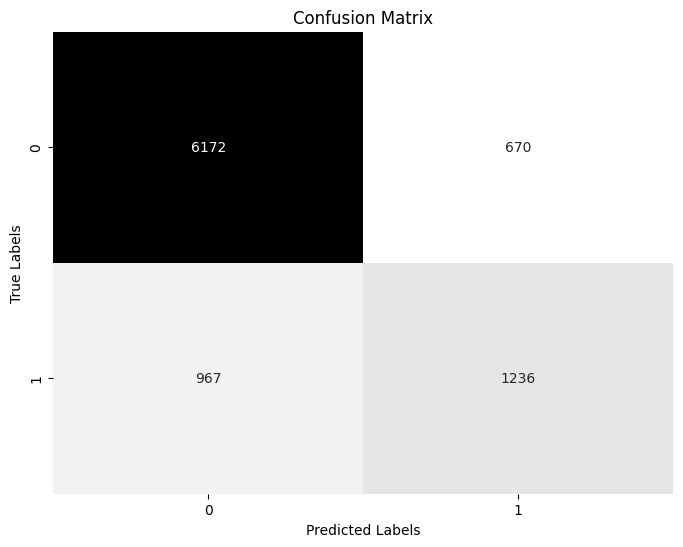

In [191]:
cm = confusion_matrix(y_test, Predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="gray_r", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [192]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, Predictions, average='weighted')
recall = recall_score(y_test, Predictions, average='weighted')
f1 = f1_score(y_test, Predictions, average='weighted')

# Print evaluation metrics
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

Precision: 0.81
Recall: 0.82
F1-score: 0.81


In [193]:
#probabilities of our predictions
y_scores = DT_model.predict_proba(X_test)

Roc_Auc_Score = roc_auc_score(y_test, y_scores[:,1])
print("ROC-AUC-Score:", Roc_Auc_Score)

ROC-AUC-Score: 0.8666796015584499


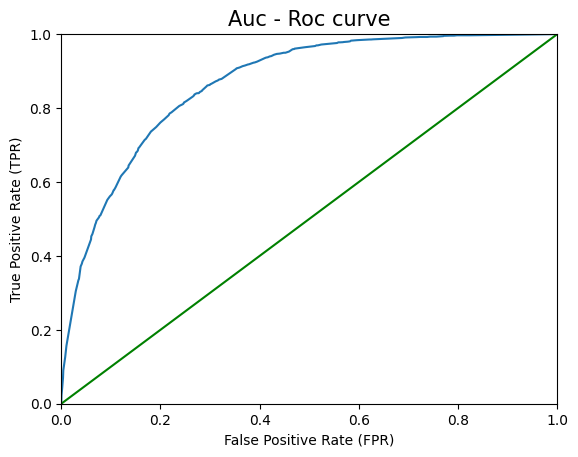

In [194]:
FPR, TPR, thresholds = roc_curve(y_test, y_scores[:,1])

plt.plot(FPR, TPR)
plt.plot([0, 1], [0, 1], 'g')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Auc - Roc curve',fontsize=15);

**the score is good enough**